First few rows of the dataset:
   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehou

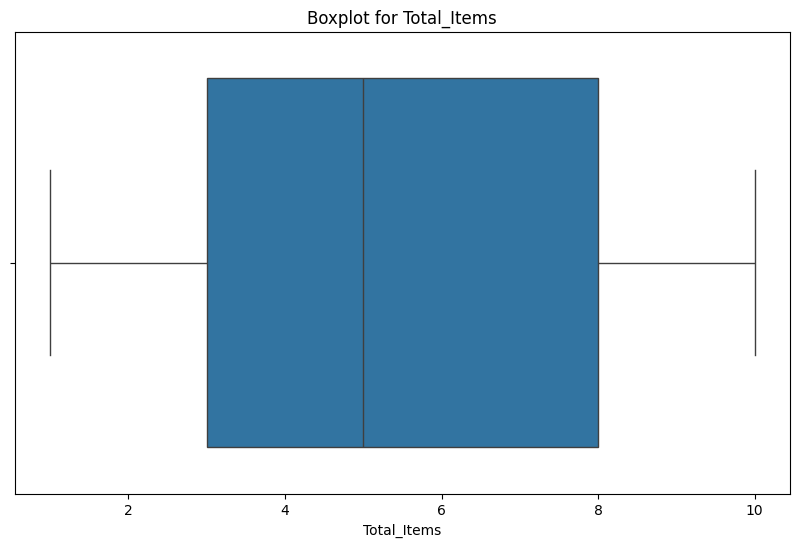

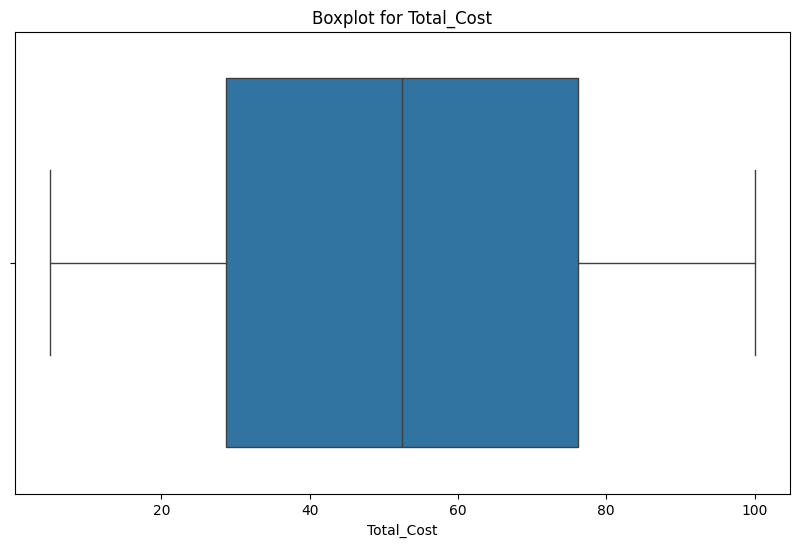

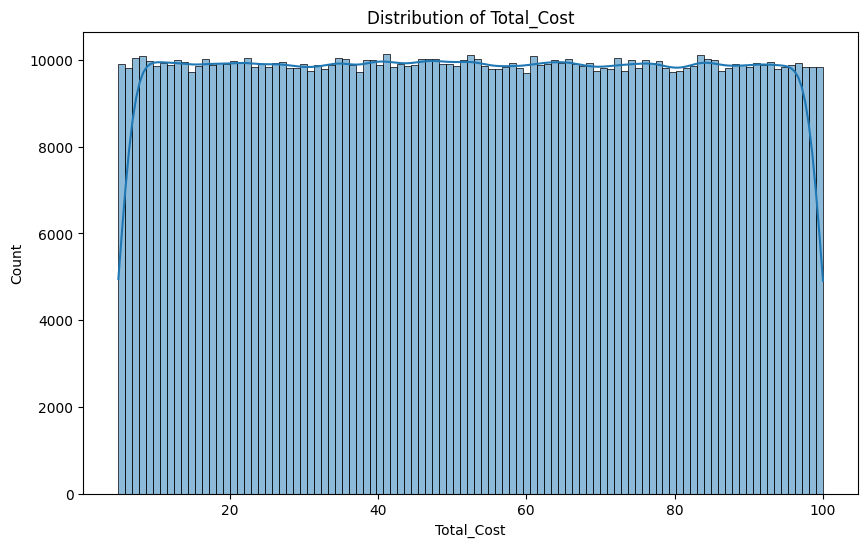

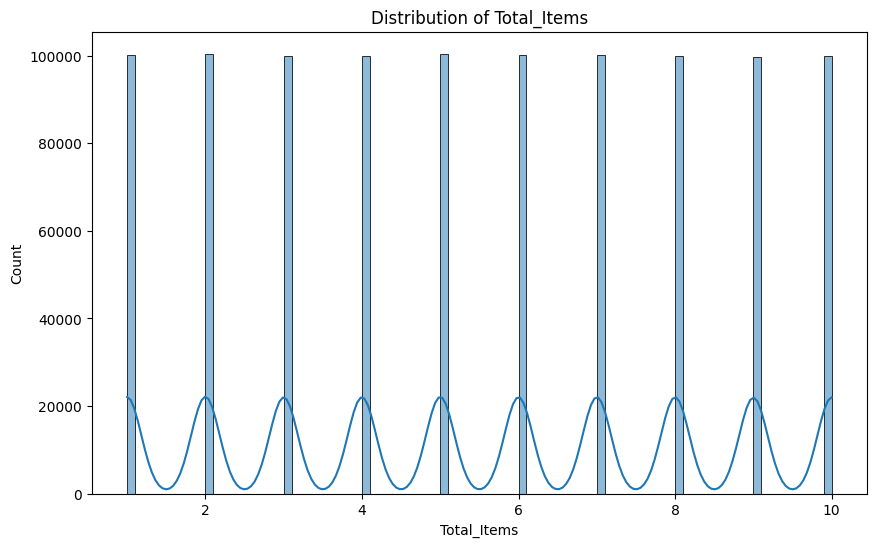

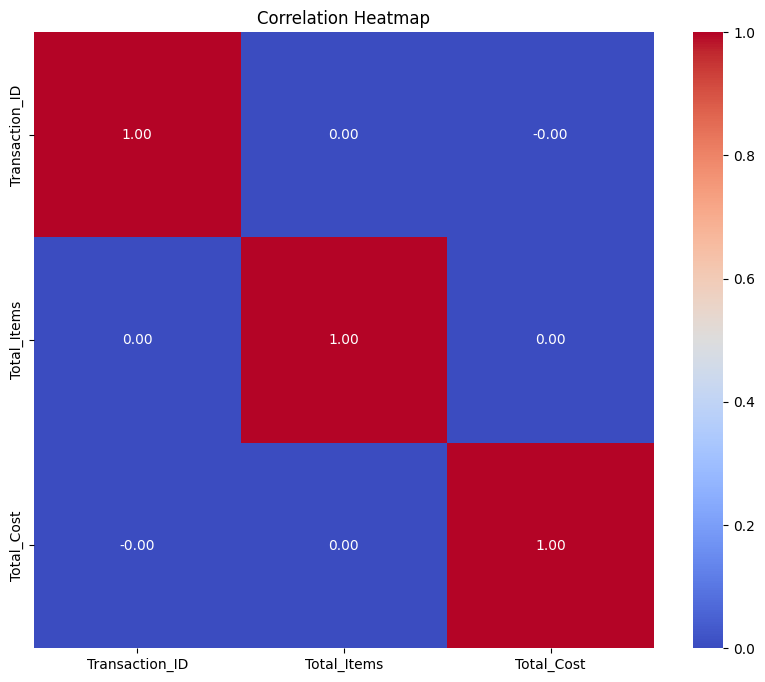

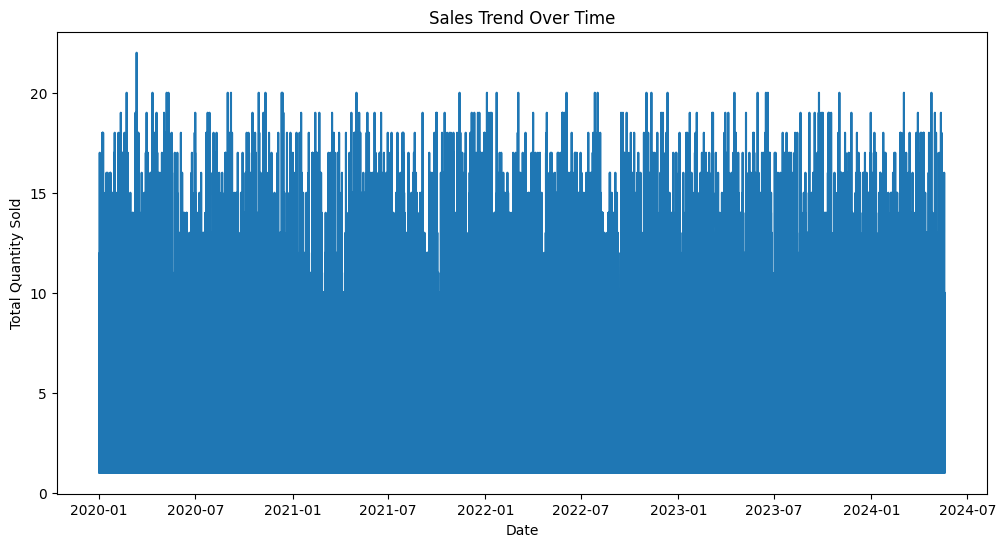


Statistical Summary of Numerical Columns:
       Transaction_ID                           Date     Total_Items  \
count    1.000000e+06                        1000000  1000000.000000   
mean     1.000500e+09  2022-03-10 21:46:28.440430080        5.495941   
min      1.000000e+09            2020-01-01 00:03:54        1.000000   
25%      1.000250e+09  2021-02-03 23:15:59.249999872        3.000000   
50%      1.000500e+09     2022-03-10 19:23:17.500000        5.000000   
75%      1.000750e+09            2023-04-14 23:06:37        8.000000   
max      1.001000e+09            2024-05-18 19:31:03       10.000000   
std      2.886753e+05                            NaN        2.871654   

           Total_Cost            Year           Month             Day  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean        52.455220     2021.716168        6.199467       15.643938   
min          5.000000     2020.000000        1.000000        1.000000   
25%         28.7

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = r"C:\Users\DELL\Desktop\archive\Retail_Transactions_Dataset.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Display the first few rows to inspect the data
print("First few rows of the dataset:")
print(df.head())

# Step 3: Check the structure and data types of the dataset
print("\nDataset Info:")
print(df.info())

# Step 4: Check for missing values in the dataset
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 5: Handle Missing Values
# I will fill missing values in the 'Total_Cost' and 'Total_Items' columns with the mean of each respective column
df['Total_Cost'] = df['Total_Cost'].fillna(df['Total_Cost'].mean())
df['Total_Items'] = df['Total_Items'].fillna(df['Total_Items'].mean())

# Check if any missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Step 6: Remove duplicates
# I will check for any duplicate rows and remove them to ensure no data redundancy
df.drop_duplicates(inplace=True)

# Check if duplicates were removed
print("\nNumber of duplicate rows after removal:", df.duplicated().sum())

# Step 7: Outlier Detection and Removal
# Using boxplots to detect and remove outliers in the 'Total_Items' and 'Total_Cost' columns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_Items'])
plt.title('Boxplot for Total_Items')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_Cost'])
plt.title('Boxplot for Total_Cost')
plt.show()

# Removing outliers using the IQR method for 'Total_Items' and 'Total_Cost'
Q1_items = df['Total_Items'].quantile(0.25)
Q3_items = df['Total_Items'].quantile(0.75)
IQR_items = Q3_items - Q1_items
lower_bound_items = Q1_items - 1.5 * IQR_items
upper_bound_items = Q3_items + 1.5 * IQR_items
df = df[(df['Total_Items'] >= lower_bound_items) & (df['Total_Items'] <= upper_bound_items)]

Q1_cost = df['Total_Cost'].quantile(0.25)
Q3_cost = df['Total_Cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost
lower_bound_cost = Q1_cost - 1.5 * IQR_cost
upper_bound_cost = Q3_cost + 1.5 * IQR_cost
df = df[(df['Total_Cost'] >= lower_bound_cost) & (df['Total_Cost'] <= upper_bound_cost)]

# Step 8: Date Parsing
# If the 'Date' column exists, I will convert it into a proper datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Extracting additional time features (if 'Date' column exists)
if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Day_of_Week'] = df['Date'].dt.dayofweek

# Step 9: Exploratory Data Analysis (EDA)

# Plot the distribution of 'Total_Cost' and 'Total_Items'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Cost'], kde=True)
plt.title('Distribution of Total_Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Items'], kde=True)
plt.title('Distribution of Total_Items')
plt.show()

# Plot the correlation matrix
# We will calculate the correlation matrix only for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 10: Sales Trend Over Time (If 'Date' exists)
if 'Date' in df.columns:
    sales_trend = df.groupby('Date')['Total_Items'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(sales_trend)
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity Sold')
    plt.show()

# Step 11: Statistical Summary of Numerical Columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Step 12: Save the cleaned dataset
output_csv_file = r"C:\Users\DELL\Desktop\cleaned_retail_transactions.csv"
df.to_csv(output_csv_file, index=False)

# Final confirmation message
print(f"\nCleaned dataset saved as: {output_csv_file}")
